### Plots médias latitudes

In [17]:
import xarray as xr
import matplotlib.pyplot as plt
import gsw
import numpy as np
import glob
import os

### Média Salinidade Modelos

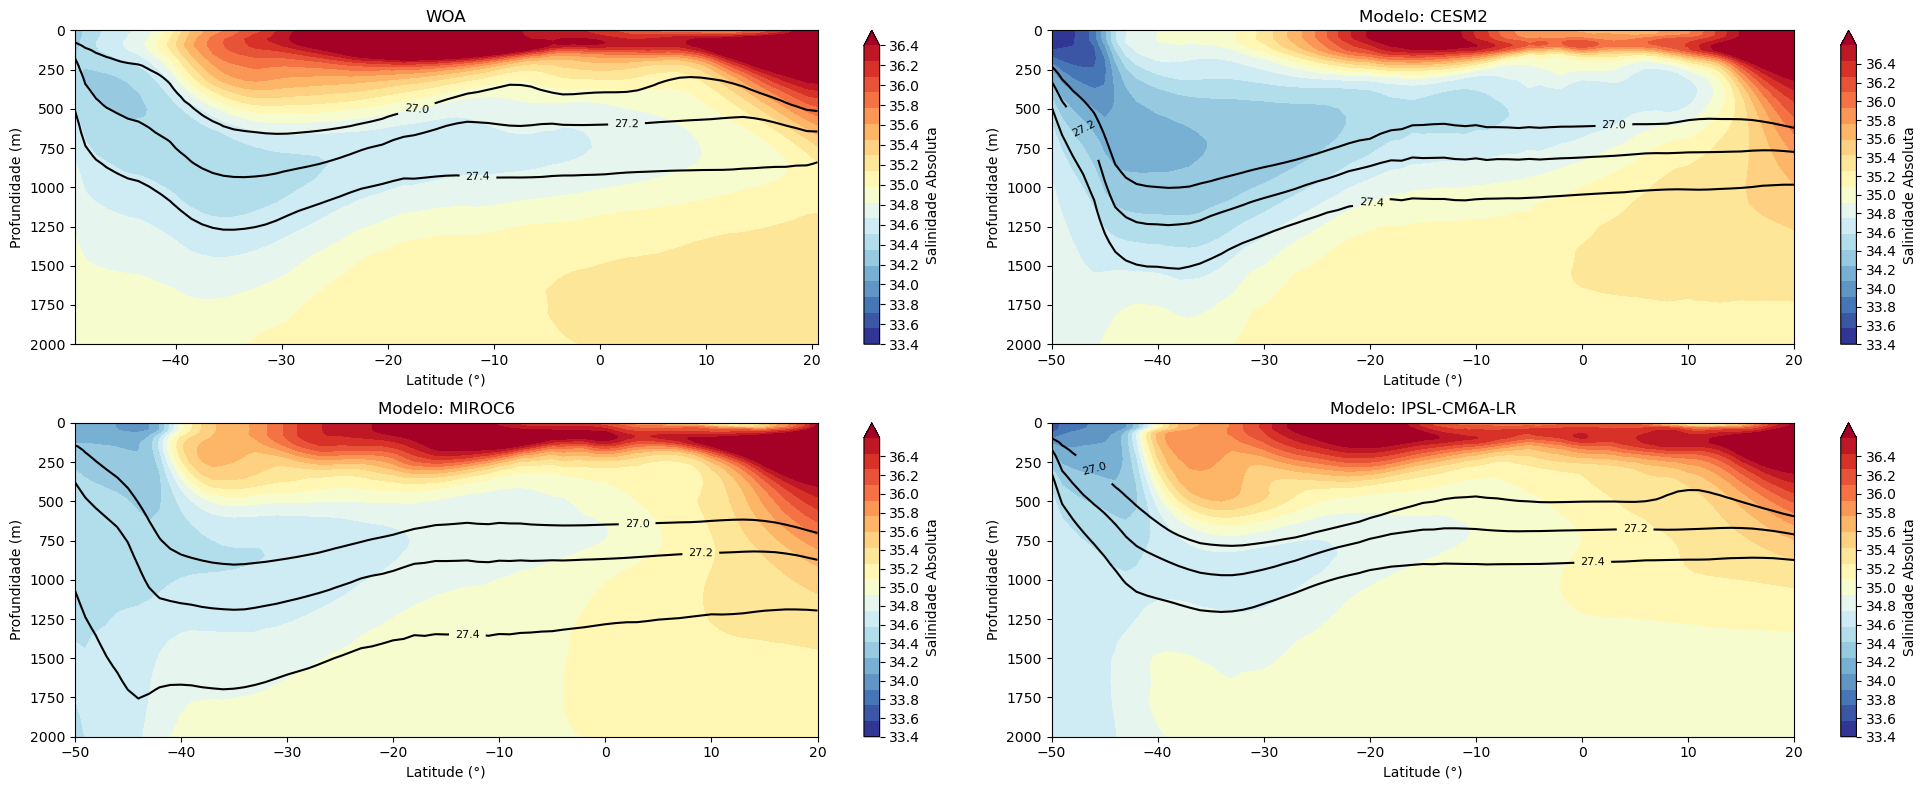

In [5]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import gsw

# Obtém o diretório atual onde está o notebook
pasta_atual = os.path.dirname(os.path.abspath('__file__'))

# Usa a biblioteca glob para obter todos os arquivos NetCDF na pasta
arquivos = glob.glob(os.path.join(pasta_atual, '*.nc'))

# Filtra os arquivos para incluir apenas aqueles com "historical" no nome
arquivos = [arquivo for arquivo in arquivos if "historical" in arquivo]

# Verifica se existem arquivos para processar
if not arquivos:
    print("Nenhum arquivo 'historical' encontrado na pasta.")
else:
    # Abre o conjunto de dados WOA
    woa_ds = xr.open_dataset("/Users/schimidel/Documents/Pastas_Iniciação/Tendências_WOA/woa_mean.nc", decode_times=False)  # Substitua pelo caminho real do seu arquivo WOA

    # Inicializa uma figura com subplots (2 linhas, 2 colunas)
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))

    # Plota o WOA no subplot correspondente
    contour_woa = woa_ds.s_an.plot.contourf(ax=axs[0, 0], x="lat", levels=20, cmap="RdYlBu_r", vmin=33.4, vmax=36.4, add_colorbar=False)
    contour_lines_woa = woa_ds.sigma_0.plot.contour(ax=axs[0, 0], levels=[27, 27.2, 27.4], colors='k')
    axs[0, 0].clabel(contour_lines_woa, inline=True, fontsize=8, fmt='%1.1f')
    axs[0, 0].set_ylim(0, 2000)
    axs[0, 0].invert_yaxis()
    axs[0, 0].set_title("WOA")
    axs[0, 0].set_xlabel("Latitude (°)")
    axs[0, 0].set_ylabel("Profundidade (m)")

    # Adiciona a colorbar manualmente
    cbar = plt.colorbar(contour_woa, ax=axs[0, 0], orientation='vertical')
    cbar.set_ticks(np.arange(33.4, 36.5, 0.2))
    cbar.set_label('Salinidade Absoluta')

    # Loop através dos arquivos
    for i, arquivo in enumerate(arquivos):
        # Abre o conjunto de dados
        ds = xr.open_dataset(arquivo)

        # Obtém o nome do modelo a partir do nome do arquivo
        modelo = os.path.basename(arquivo).split(".")[2]  # Ajuste isso conforme a estrutura dos seus nomes de arquivo

        # Calcula a média zonal
        zonal = ds.sel(time=slice("1955", "2014")).mean(dim="time")
        zonal["sigma0"] = gsw.sigma0(zonal["sa"], zonal["thetao"])

        # Plota no subplot correspondente (2 linhas, 2 colunas)
        row = (i + 1) // 2  # Adicionei +1 para garantir que o WOA permaneça na posição [0, 0]
        col = (i + 1) % 2   # Adicionei +1 para garantir que o WOA permaneça na posição [0, 0]
        contour = zonal.so.plot.contourf(ax=axs[row, col], x="lat", levels=20, cmap="RdYlBu_r", vmin=33.4, vmax=36.6, add_colorbar=False)
        # Aplicar máscara para sigma0 > 26.4
        masked_sigma0 = zonal.sigma0.where(zonal.sigma0 > 26.4)
        # Plot do contorno para sigma0 após aplicar a máscara
        contour_lines = masked_sigma0.plot.contour(ax=axs[row, col], levels=[27, 27.2, 27.4], colors='k')
        axs[row, col].clabel(contour_lines, inline=True, fontsize=8, fmt='%1.1f')
        axs[row, col].set_ylim(0, 2000)
        axs[row, col].invert_yaxis()
        axs[row, col].set_title(f"Modelo: {modelo}")
        axs[row, col].set_xlabel('Latitude (°)')
        axs[row, col].set_ylabel('Profundidade (m)')

        # Adiciona a colorbar manualmente
        cbar = plt.colorbar(contour, ax=axs[row, col], orientation='vertical')
        cbar.set_ticks(np.arange(33.4, 36.5, 0.2))
        cbar.set_label('Salinidade Absoluta')

        # Fecha o conjunto de dados
        ds.close()

    # Ajusta o layout para evitar sobreposição de subplots
    plt.tight_layout()

    # Salva a figura
    plt.savefig('Figuras/Salinidade_Modelos_com_WOA.png', bbox_inches='tight')

    # Mostra a figura (opcional)
    plt.show()

    # Fecha o conjunto de dados WOA
    woa_ds.close()


## Média Salinidade

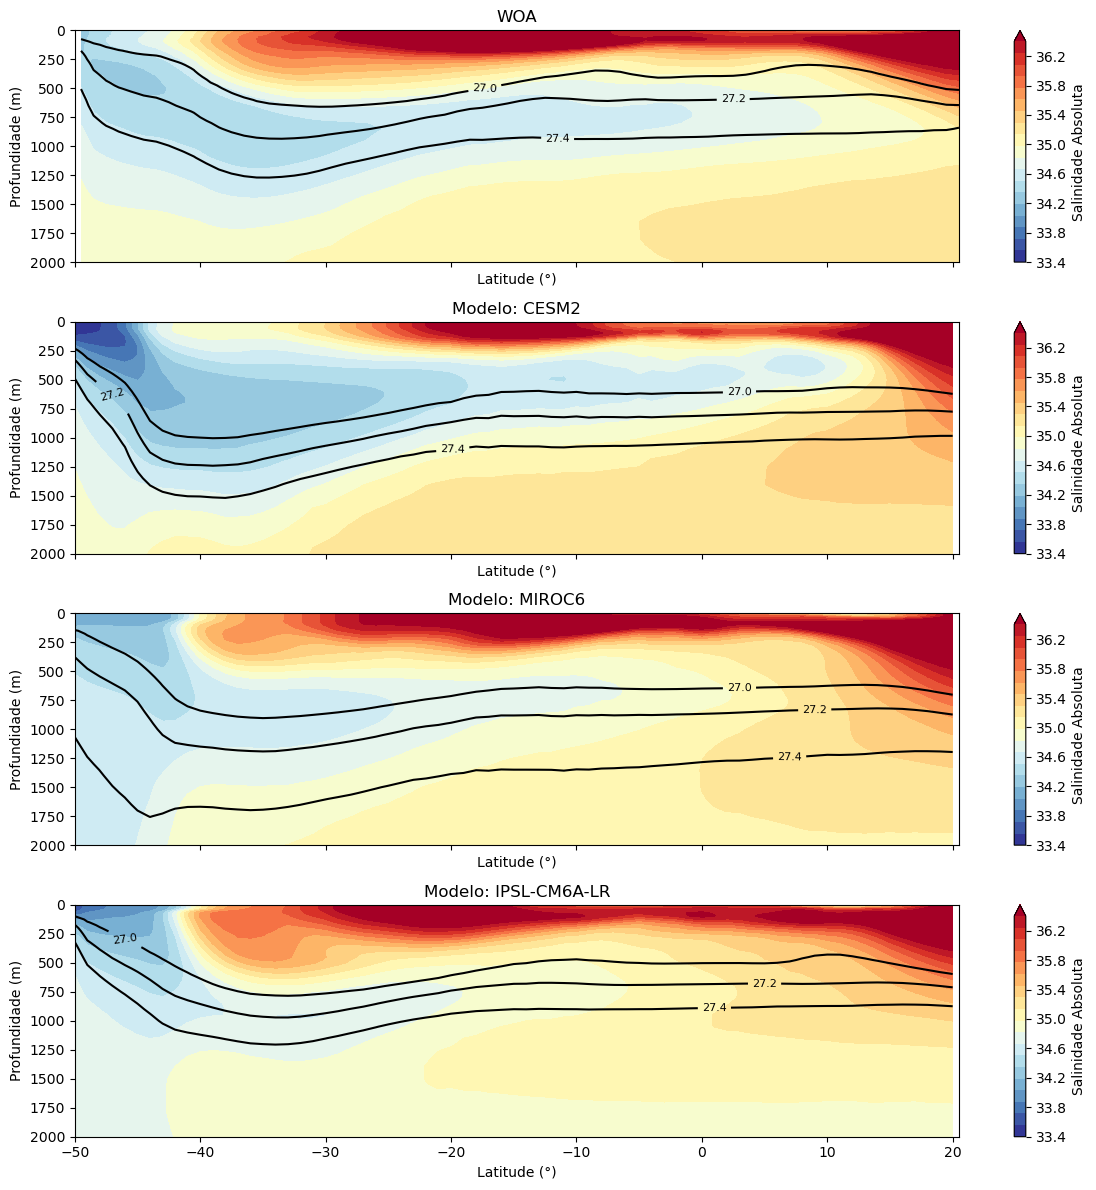

In [7]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import gsw  # Certifique-se de ter essa biblioteca instalada

# Obtém o diretório atual onde está o notebook
pasta_atual = os.path.dirname(os.path.abspath('__file__'))

# Usa a biblioteca glob para obter todos os arquivos NetCDF na pasta
arquivos = glob.glob(os.path.join(pasta_atual, '*.nc'))

# Filtra os arquivos para incluir apenas aqueles com "historical" no nome
arquivos = [arquivo for arquivo in arquivos if "historical" in arquivo]

# Verifica se existem arquivos para processar
if not arquivos:
    print("Nenhum arquivo 'historical' encontrado na pasta.")
else:
    # Abre o conjunto de dados WOA
    woa_ds = xr.open_dataset("/Users/schimidel/Documents/Pastas_Iniciação/Tendências_WOA/woa_mean.nc", decode_times=False)  # Substitua pelo caminho real do seu arquivo WOA

    # Inicializa uma figura com subplots
    fig, axs = plt.subplots(nrows=len(arquivos) + 1, figsize=(12, 3 * (len(arquivos) + 1)), sharex=True)

    # Plota o WOA no subplot correspondente
    contour_woa = woa_ds.s_an.plot.contourf(ax=axs[0], x="lat", levels=20, cmap="RdYlBu_r", vmin=33.4, vmax=36.4, add_colorbar=False)
    contour_lines_woa = woa_ds.sigma_0.plot.contour(ax=axs[0], levels=[27, 27.2, 27.4], colors='k')
    axs[0].clabel(contour_lines_woa, inline=True, fontsize=8, fmt='%1.1f')
    axs[0].set_ylim(0, 2000)
    axs[0].invert_yaxis()
    axs[0].set_title("WOA")
    axs[0].set_xlabel("Latitude (°)")
    axs[0].set_ylabel("Profundidade (m)")
    # Adiciona a colorbar manualmente
    cbar = plt.colorbar(contour_woa, ax=axs[0], orientation='vertical')
    cbar.set_ticks(np.arange(33.4, 36.5, 0.4))
    cbar.set_label('Salinidade Absoluta')


    # Loop através dos arquivos
    for i, arquivo in enumerate(arquivos):
        # Abre o conjunto de dados
        ds = xr.open_dataset(arquivo)

        # Obtém o nome do modelo a partir do nome do arquivo
        modelo = os.path.basename(arquivo).split(".")[2]  # Ajuste isso conforme a estrutura dos seus nomes de arquivo

        # Calcula a média zonal
        zonal = ds.sel(time=slice("1955", "2014")).mean(dim="time")
        zonal["sigma0"] = gsw.sigma0(zonal["sa"], zonal["thetao"])

        # Plota no subplot correspondente
        contour = zonal.so.plot.contourf(ax=axs[i + 1], x="lat", levels=20, cmap="RdYlBu_r", vmin=33.4, vmax=36.4, add_colorbar=False)
        # Aplicar máscara para sigma0 > 26.4
        masked_sigma0 = zonal.sigma0.where(zonal.sigma0 > 26.4)
        # Plot do contorno para sigma0 após aplicar a máscara
        contour_lines = masked_sigma0.plot.contour(ax=axs[i + 1], levels=[27, 27.2, 27.4], colors='k')
        axs[i + 1].clabel(contour_lines, inline=True, fontsize=8, fmt='%1.1f')
        axs[i + 1].set_ylim(0, 2000)
        axs[i + 1].invert_yaxis()
        axs[i + 1].set_title(f"Modelo: {modelo}")
        axs[i + 1].set_xlabel('Latitude (°)')
        axs[i + 1].set_ylabel('Profundidade (m)')

        # Adiciona a colorbar manualmente
        cbar = plt.colorbar(contour, ax=axs[i + 1], orientation='vertical')
        cbar.set_ticks(np.arange(33.4, 36.5, 0.4))
        cbar.set_label('Salinidade Absoluta')

        # Fecha o conjunto de dados
        ds.close()

    # Ajusta o layout para evitar sobreposição de subplots
    plt.tight_layout()

    # Salva a figura
    plt.savefig('Figuras/Salinidade_Modelos_com_WOA.png', bbox_inches='tight')

    # Mostra a figura (opcional)
    plt.show()

    # Fecha o conjunto de dados WOA
    woa_ds.close()


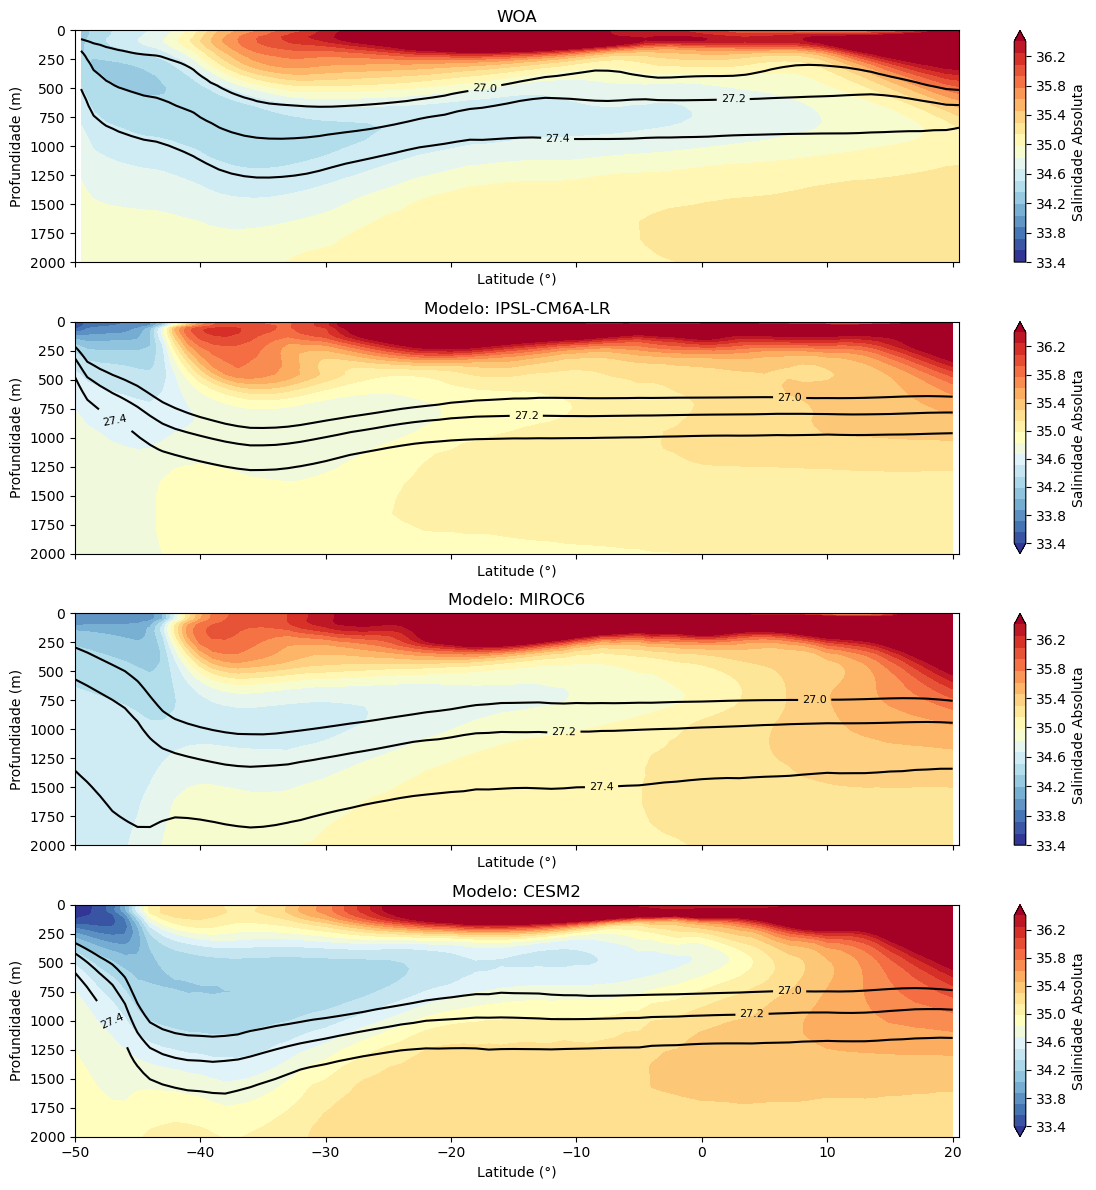

In [2]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import gsw  # Certifique-se de ter essa biblioteca instalada

# Obtém o diretório atual onde está o notebook
pasta_atual = os.path.dirname(os.path.abspath('__file__'))

# Usa a biblioteca glob para obter todos os arquivos NetCDF na pasta
arquivos = glob.glob(os.path.join(pasta_atual, '*.nc'))

# Filtra os arquivos para incluir apenas aqueles com "historical" no nome
arquivos = [arquivo for arquivo in arquivos if "ssp585" in arquivo]

# Verifica se existem arquivos para processar
if not arquivos:
    print("Nenhum arquivo 'historical' encontrado na pasta.")
else:
    # Abre o conjunto de dados WOA
    woa_ds = xr.open_dataset("/Users/schimidel/Documents/Pastas_Iniciação/Tendências_WOA/woa_mean.nc", decode_times=False)  # Substitua pelo caminho real do seu arquivo WOA

    # Inicializa uma figura com subplots
    fig, axs = plt.subplots(nrows=len(arquivos) + 1, figsize=(12, 3 * (len(arquivos) + 1)), sharex=True)

    # Plota o WOA no subplot correspondente
    contour_woa = woa_ds.s_an.plot.contourf(ax=axs[0], x="lat", levels=20, cmap="RdYlBu_r", vmin=33.4, vmax=36.4, add_colorbar=False)
    contour_lines_woa = woa_ds.sigma_0.plot.contour(ax=axs[0], levels=[27, 27.2, 27.4], colors='k')
    axs[0].clabel(contour_lines_woa, inline=True, fontsize=8, fmt='%1.1f')
    axs[0].set_ylim(0, 2000)
    axs[0].invert_yaxis()
    axs[0].set_title("WOA")
    axs[0].set_xlabel("Latitude (°)")
    axs[0].set_ylabel("Profundidade (m)")
    # Adiciona a colorbar manualmente
    cbar = plt.colorbar(contour_woa, ax=axs[0], orientation='vertical')
    cbar.set_ticks(np.arange(33.4, 36.5, 0.4))
    cbar.set_label('Salinidade Absoluta')


    # Loop através dos arquivos
    for i, arquivo in enumerate(arquivos):
        # Abre o conjunto de dados
        ds = xr.open_dataset(arquivo)

        # Obtém o nome do modelo a partir do nome do arquivo
        modelo = os.path.basename(arquivo).split(".")[2]  # Ajuste isso conforme a estrutura dos seus nomes de arquivo

        # Calcula a média zonal
        zonal = ds.sel(time=slice("2080", "2100")).mean(dim="time")
        zonal["sigma0"] = gsw.sigma0(zonal["sa"], zonal["thetao"])

        # Plota no subplot correspondente
        contour = zonal.so.plot.contourf(ax=axs[i + 1], x="lat", levels=20, cmap="RdYlBu_r", vmin=33.4, vmax=36.4, add_colorbar=False)
        # Aplicar máscara para sigma0 > 26.4
        masked_sigma0 = zonal.sigma0.where(zonal.sigma0 > 26.4)
        # Plot do contorno para sigma0 após aplicar a máscara
        contour_lines = masked_sigma0.plot.contour(ax=axs[i + 1], levels=[27, 27.2, 27.4], colors='k')
        axs[i + 1].clabel(contour_lines, inline=True, fontsize=8, fmt='%1.1f')
        axs[i + 1].set_ylim(0, 2000)
        axs[i + 1].invert_yaxis()
        axs[i + 1].set_title(f"Modelo: {modelo}")
        axs[i + 1].set_xlabel('Latitude (°)')
        axs[i + 1].set_ylabel('Profundidade (m)')

        # Adiciona a colorbar manualmente
        cbar = plt.colorbar(contour, ax=axs[i + 1], orientation='vertical')
        cbar.set_ticks(np.arange(33.4, 36.5, 0.4))
        cbar.set_label('Salinidade Absoluta')

        # Fecha o conjunto de dados
        ds.close()

    # Ajusta o layout para evitar sobreposição de subplots
    plt.tight_layout()

    # Salva a figura
    plt.savefig('Figuras/Salinidade_Modelos_com_WOA.png', bbox_inches='tight')

    # Mostra a figura (opcional)
    plt.show()

    # Fecha o conjunto de dados WOA
    woa_ds.close()


### Média temperatura

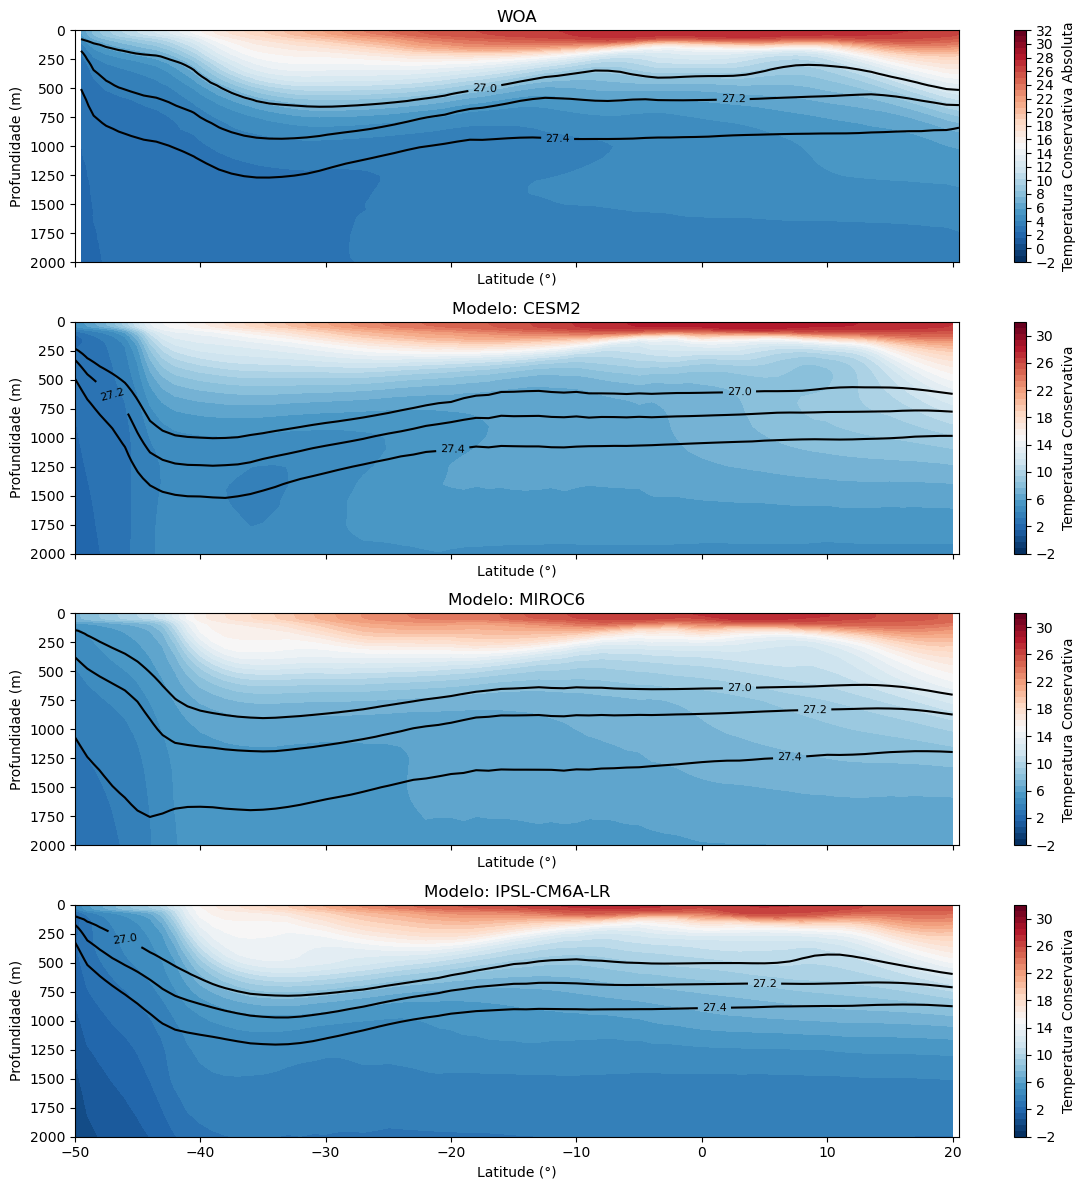

In [7]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import gsw  # Certifique-se de ter essa biblioteca instalada

# Obtém o diretório atual onde está o notebook
pasta_atual = os.path.dirname(os.path.abspath('__file__'))

# Usa a biblioteca glob para obter todos os arquivos NetCDF na pasta
arquivos = glob.glob(os.path.join(pasta_atual, '*.nc'))

# Filtra os arquivos para incluir apenas aqueles com "historical" no nome
arquivos = [arquivo for arquivo in arquivos if "historical" in arquivo]

# Verifica se existem arquivos para processar
if not arquivos:
    print("Nenhum arquivo 'historical' encontrado na pasta.")
else:
    # Abre o conjunto de dados WOA
    woa_ds = xr.open_dataset("/Users/schimidel/Documents/Pastas_Iniciação/Tendências_WOA/woa_mean.nc", 
                             decode_times=False)  # Substitua pelo caminho real do seu arquivo WOA

    # Inicializa uma figura com subplots
    fig, axs = plt.subplots(nrows=len(arquivos) + 1, figsize=(12, 3 * (len(arquivos) + 1)), sharex=True)

    # Plota o WOA no subplot correspondente
    contour_woa = woa_ds.t_an.plot.contourf(ax=axs[0], x="lat", levels=40, cmap="RdBu_r", vmin=-2, vmax=32, add_colorbar=False)
    contour_lines_woa = woa_ds.sigma_0.plot.contour(ax=axs[0], levels=[27, 27.2, 27.4], colors='k')
    axs[0].clabel(contour_lines_woa, inline=True, fontsize=8, fmt='%1.1f')
    axs[0].set_ylim(0, 2000)
    axs[0].invert_yaxis()
    axs[0].set_title("WOA")
    axs[0].set_xlabel("Latitude (°)")
    axs[0].set_ylabel("Profundidade (m)")
    # Adiciona a colorbar manualmente
    cbar = plt.colorbar(contour_woa, ax=axs[0], orientation='vertical')
    cbar.set_ticks(np.arange(-2, 33, 2))  # Ajuste os ticks conforme necessário
    cbar.set_label('Temperatura Conservativa Absoluta')


    # Loop através dos arquivos
    for i, arquivo in enumerate(arquivos):
        # Abre o conjunto de dados
        ds = xr.open_dataset(arquivo)

        # Obtém o nome do modelo a partir do nome do arquivo
        modelo = os.path.basename(arquivo).split(".")[2]  # Ajuste isso conforme a estrutura dos seus nomes de arquivo

        # Calcula a média zonal
        zonal = ds.sel(time=slice("1955", "2014")).mean(dim="time")
        zonal["sigma0"] = gsw.sigma0(zonal["sa"], zonal["thetao"])

        # Plota no subplot correspondente
        contour = zonal.thetao.plot.contourf(ax=axs[i + 1], x="lat", levels=40, cmap="RdBu_r", 
                                             vmin=-2, vmax=32, add_colorbar=False)
        # Aplicar máscara para sigma0 > 26.4
        masked_sigma0 = zonal.sigma0.where(zonal.sigma0 > 26.4)
        # Plot do contorno para sigma0 após aplicar a máscara
        contour_lines = masked_sigma0.plot.contour(ax=axs[i + 1], levels=[27, 27.2, 27.4], colors='k')
        axs[i + 1].clabel(contour_lines, inline=True, fontsize=8, fmt='%1.1f')
        axs[i + 1].set_ylim(0, 2000)
        axs[i + 1].invert_yaxis()
        axs[i + 1].set_title(f"Modelo: {modelo}")
        axs[i + 1].set_xlabel('Latitude (°)')
        axs[i + 1].set_ylabel('Profundidade (m)')

        # Adiciona a colorbar manualmente
        cbar = plt.colorbar(contour, ax=axs[i + 1], orientation='vertical')
        cbar.set_ticks(np.arange(-2, 33, 4))  # Ajuste os ticks conforme necessário
        cbar.set_label('Temperatura Conservativa')

        # Fecha o conjunto de dados
        ds.close()

    # Ajusta o layout para evitar sobreposição de subplots
    plt.tight_layout()

    # Salva a figura
    plt.savefig('Figuras/Temperatura_Modelos_com_WOA.png', bbox_inches='tight')

    # Mostra a figura (opcional)
    plt.show()

    # Fecha o conjunto de dados WOA
    woa_ds.close()


## Plots diferenças hist 1995–2014 menos 1955–1974

In [ ]:
import os
import glob
import numpy as np
import xarray as xr
import gsw
import matplotlib.pyplot as plt

# Obtém o diretório atual onde está o notebook
pasta_atual = os.path.dirname(os.path.abspath('__file__'))

# Usa a biblioteca glob para obter todos os arquivos NetCDF na pasta
arquivos = glob.glob(os.path.join(pasta_atual, '*.nc'))

# Filtra os arquivos para incluir apenas aqueles com "historical" no nome
arquivos = [arquivo for arquivo in arquivos if "historical" in arquivo]

# Verifica se existem arquivos para processar
if not arquivos:
    print("Nenhum arquivo 'historical' encontrado na pasta.")

# Cria a figura com espaçamento vertical entre os subplots
fig, axs = plt.subplots(len(arquivos)+1, figsize=(12, 3 * (len(arquivos)+1)), sharex=True, 
                        sharey=True, gridspec_kw={'hspace': 0.3})

h_mean = xr.open_dataset("/Users/schimidel/Documents/Pastas_Iniciação/Tendências_WOA/h_mean_woa.nc")
f_mean = xr.open_dataset("/Users/schimidel/Documents/Pastas_Iniciação/Tendências_WOA/f_mean_woa.nc")
diff = f_mean - h_mean

contour = diff.s_an.plot.contourf(ax=axs[0], x="lat", levels=50, cmap="RdBu_r", add_colorbar=False, vmin=-0.2, vmax=0.2)
# Converter os dados do xarray em numpy
contour_data = h_mean.sigma_0.values
lat_values = h_mean.lat.values

# Usar o contour do Matplotlib
contour_lines = axs[0].contour(lat_values, h_mean.depth, contour_data, levels=[27, 27.2, 27.4], 
                            colors='k', linestyles="solid")

# Converter os dados do xarray em numpy
contour_data = f_mean.sigma_0.values
lat_values = f_mean.lat.values

# Usar o contour do Matplotlib
contour_lines = axs[0].contour(lat_values, f_mean.depth, contour_data, levels=[27, 27.2, 27.4], 
                            colors='red', linestyles="dashed")

axs[0].set_ylim(0, 2000)#
axs[0].set_xlim(-50, 20)#
axs[0].invert_yaxis()
# Adiciona a colorbar manualmente para o último subplot
cbar = plt.colorbar(contour, ax=axs[0], orientation='vertical', pad=0.02)
cbar.set_label('Anomalia  Salinidade')
cbar.set_ticks(np.arange(-0.2, 0.21, 0.04))
axs[0].set_xlabel("Latitude (°)")
axs[0].set_ylabel("Profundidade (m)")
axs[0].set_title("WOA")

# Loop através dos arquivos
for i, arquivo in enumerate(arquivos):
    
    if "historical" in arquivo:
        # Abre o conjunto de dados
        ds = xr.open_dataset(arquivo)

        # Obtém o nome do modelo a partir do nome do arquivo
        modelo = os.path.basename(arquivo).split(".")[2]  # Ajuste isso conforme a estrutura dos seus nomes de arquivo

        # Calcula a média zonal
        zonal1 = ds.sel(time=slice("1955", "1974")).mean(dim="time")
        zonal2 = ds.sel(time=slice("1995", "2014")).mean(dim="time")
        zonal1["sigma0"] = gsw.sigma0(zonal1["sa"], zonal1["thetao"])
        zonal2["sigma0"] = gsw.sigma0(zonal2["sa"], zonal2["thetao"])
        diff = zonal2 - zonal1
        
        # Adiciona o subplot correspondente
        ax = axs[i+1]
        
        # Faz o plot
        contour = diff.so.plot.contourf(ax=ax, x="lat", levels=50, cmap="RdBu_r", add_colorbar=False, vmin=-0.2, vmax=0.2)
        
        # Aplicar máscara para sigma0 > 26.4
        masked1_sigma0 = zonal1.sigma0.where(zonal1.sigma0 > 26.4)
        masked2_sigma0 = zonal2.sigma0.where(zonal2.sigma0 > 26.4)

        # Converter os dados do xarray em numpy
        contour_data = masked1_sigma0.values
        lat_values = masked1_sigma0.lat.values

        # Usar o contour do Matplotlib
        contour_lines = ax.contour(lat_values, masked1_sigma0.lev, contour_data, levels=[27, 27.2, 27.4], 
                                   colors='black', linestyles="solid")

        # Converter os dados do xarray em numpy
        contour_data = masked2_sigma0.values
        lat_values = masked2_sigma0.lat.values

        # Usar o contour do Matplotlib
        contour_lines = ax.contour(lat_values, masked2_sigma0.lev, contour_data, levels=[27, 27.2, 27.4], 
                                   colors='red', linestyles="dashed")
        
        ax.set_ylim(0, 2000)
        ax.invert_yaxis()
        ax.set_title(f"Modelo: {modelo}")
        
        # Adicionando rótulos aos eixos X e Y
        ax.set_xlabel('Latitude (°)')
        ax.set_ylabel('Profundidade (m)')
        
        # Adiciona a colorbar manualmente para o último subplot
        cbar = plt.colorbar(contour, ax=axs[i+1], orientation='vertical', pad=0.02)
        cbar.set_ticks(np.arange(-0.2, 0.21, 0.04))  # Ajuste os ticks conforme necessário
        cbar.set_label('Anomalia Salinidade')
        # Fecha o conjunto de dados
        ds.close()
        

plt.savefig("Figuras/Anomalias_Modelos_WOA_Salinidade.png")
plt.show()


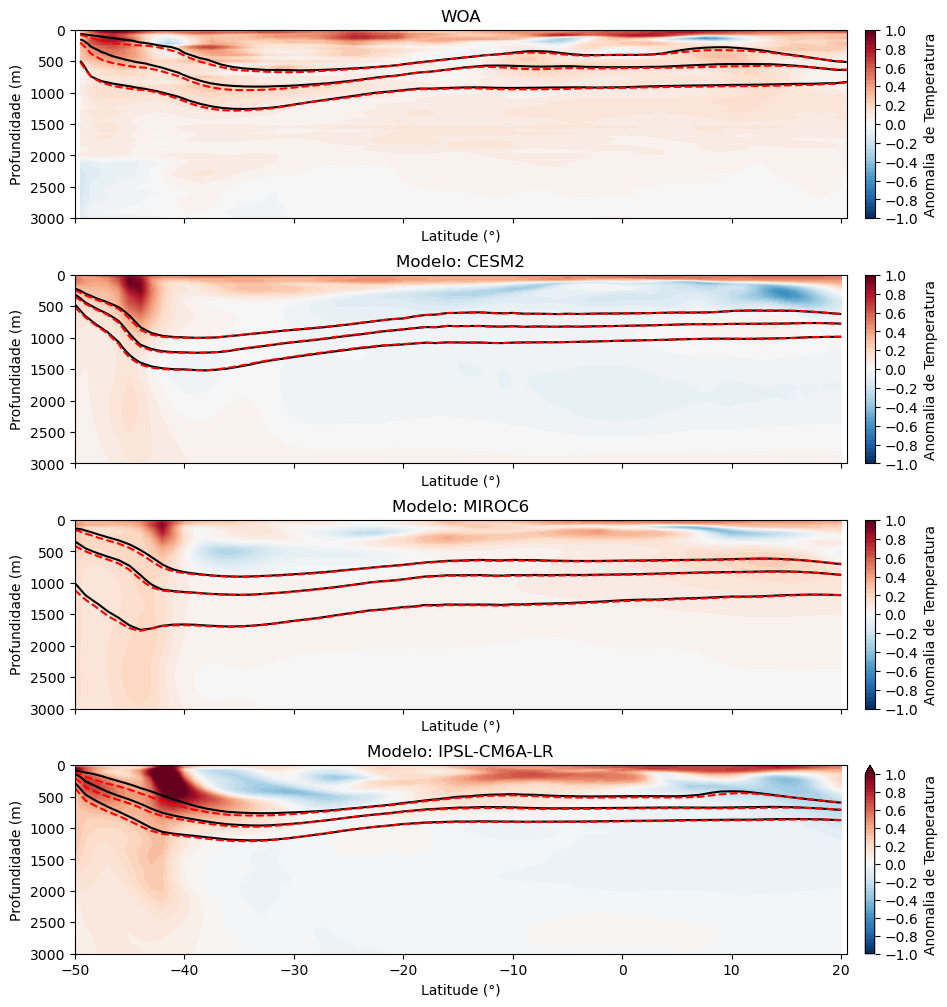

In [4]:
import os
import glob
import numpy as np
import xarray as xr
import gsw
import matplotlib.pyplot as plt

# Obtém o diretório atual onde está o notebook
pasta_atual = os.path.dirname(os.path.abspath('__file__'))

# Usa a biblioteca glob para obter todos os arquivos NetCDF na pasta
arquivos = glob.glob(os.path.join(pasta_atual, '*.nc'))

# Filtra os arquivos para incluir apenas aqueles com "historical" no nome
arquivos = [arquivo for arquivo in arquivos if "historical" in arquivo]

# Verifica se existem arquivos para processar
if not arquivos:
    print("Nenhum arquivo 'historical' encontrado na pasta.")

# Cria a figura com espaçamento vertical entre os subplots
fig, axs = plt.subplots(len(arquivos)+1, figsize=(12, 3 * (len(arquivos)+1)), sharex=True, sharey=True,
                        gridspec_kw={'hspace': 0.3})

h_mean = xr.open_dataset("/Users/schimidel/Documents/Pastas_Iniciação/Tendências_WOA/h_mean_woa.nc")
f_mean = xr.open_dataset("/Users/schimidel/Documents/Pastas_Iniciação/Tendências_WOA/f_mean_woa.nc")
diff = f_mean - h_mean

contour = diff.t_an.plot.contourf(ax=axs[0], x="lat", levels=50, cmap="RdBu_r", add_colorbar=False, 
                                  vmin=-1, vmax=1)
# Converter os dados do xarray em numpy
contour_data = h_mean.sigma_0.values
lat_values = h_mean.lat.values

# Usar o contour do Matplotlib
contour_lines = axs[0].contour(lat_values, h_mean.depth, contour_data, levels=[27, 27.2, 27.4], 
                            colors='k', linestyles="solid")

# Converter os dados do xarray em numpy
contour_data = f_mean.sigma_0.values
lat_values = f_mean.lat.values

# Usar o contour do Matplotlib
contour_lines = axs[0].contour(lat_values, f_mean.depth, contour_data, levels=[27, 27.2, 27.4], 
                            colors='red', linestyles="dashed")

axs[0].set_ylim(0, 3000)#
axs[0].invert_yaxis()
# Adiciona a colorbar manualmente para o último subplot
cbar = plt.colorbar(contour, ax=axs[0], orientation='vertical', pad=0.02)
cbar.set_label('Anomalia  de Temperatura')
cbar.set_ticks(np.arange(-1, 1.1, 0.2))
axs[0].set_xlabel("Latitude (°)")
axs[0].set_ylabel("Profundidade (m)")
axs[0].set_title("WOA")

# Loop através dos arquivos
for i, arquivo in enumerate(arquivos):
    
    if "historical" in arquivo:
        # Abre o conjunto de dados
        ds = xr.open_dataset(arquivo)

        # Obtém o nome do modelo a partir do nome do arquivo
        modelo = os.path.basename(arquivo).split(".")[2]  # Ajuste isso conforme a estrutura dos seus nomes de arquivo

        # Calcula a média zonal
        zonal1 = ds.sel(time=slice("1955", "1974")).mean(dim="time")
        zonal2 = ds.sel(time=slice("1995", "2014")).mean(dim="time")
        zonal1["sigma0"] = gsw.sigma0(zonal1["sa"], zonal1["thetao"])
        zonal2["sigma0"] = gsw.sigma0(zonal2["sa"], zonal2["thetao"])
        diff = zonal2 - zonal1
        
        # Adiciona o subplot correspondente
        ax = axs[i+1]
        
        # Faz o plot
        contour = diff.thetao.plot.contourf(ax=ax, x="lat", levels=50, cmap="RdBu_r", add_colorbar=False, 
                                        vmin=-1, vmax=1)
        
        # Aplicar máscara para sigma0 > 26.4
        masked1_sigma0 = zonal1.sigma0.where(zonal1.sigma0 > 26.4)
        masked2_sigma0 = zonal2.sigma0.where(zonal2.sigma0 > 26.4)

        # Converter os dados do xarray em numpy
        contour_data = masked1_sigma0.values
        lat_values = masked1_sigma0.lat.values

        # Usar o contour do Matplotlib
        contour_lines = ax.contour(lat_values, masked1_sigma0.lev, contour_data, levels=[27, 27.2, 27.4], 
                                   colors='black', linestyles="solid")

        # Converter os dados do xarray em numpy
        contour_data = masked2_sigma0.values
        lat_values = masked2_sigma0.lat.values

        # Usar o contour do Matplotlib
        contour_lines = ax.contour(lat_values, masked2_sigma0.lev, contour_data, levels=[27, 27.2, 27.4], 
                                   colors='red', linestyles="dashed")
        
        ax.set_ylim(0, 3000)
        ax.invert_yaxis()
        ax.set_title(f"Modelo: {modelo}")
        
        # Adicionando rótulos aos eixos X e Y
        ax.set_xlabel('Latitude (°)')
        ax.set_ylabel('Profundidade (m)')
        
        # Adiciona a colorbar manualmente para o último subplot
        cbar = plt.colorbar(contour, ax=axs[i+1], orientation='vertical', pad=0.02)
        cbar.set_ticks(np.arange(-1, 1.1, 0.2))  # Ajuste os ticks conforme necessário
        cbar.set_label('Anomalia de Temperatura')
        # Fecha o conjunto de dados
        ds.close()

plt.savefig("Figuras/Anomalias_Modelos_WOA_Temperatura.png")
plt.show()


## Plots diferenças entre tempos futuros

### SSP585 Salinidade

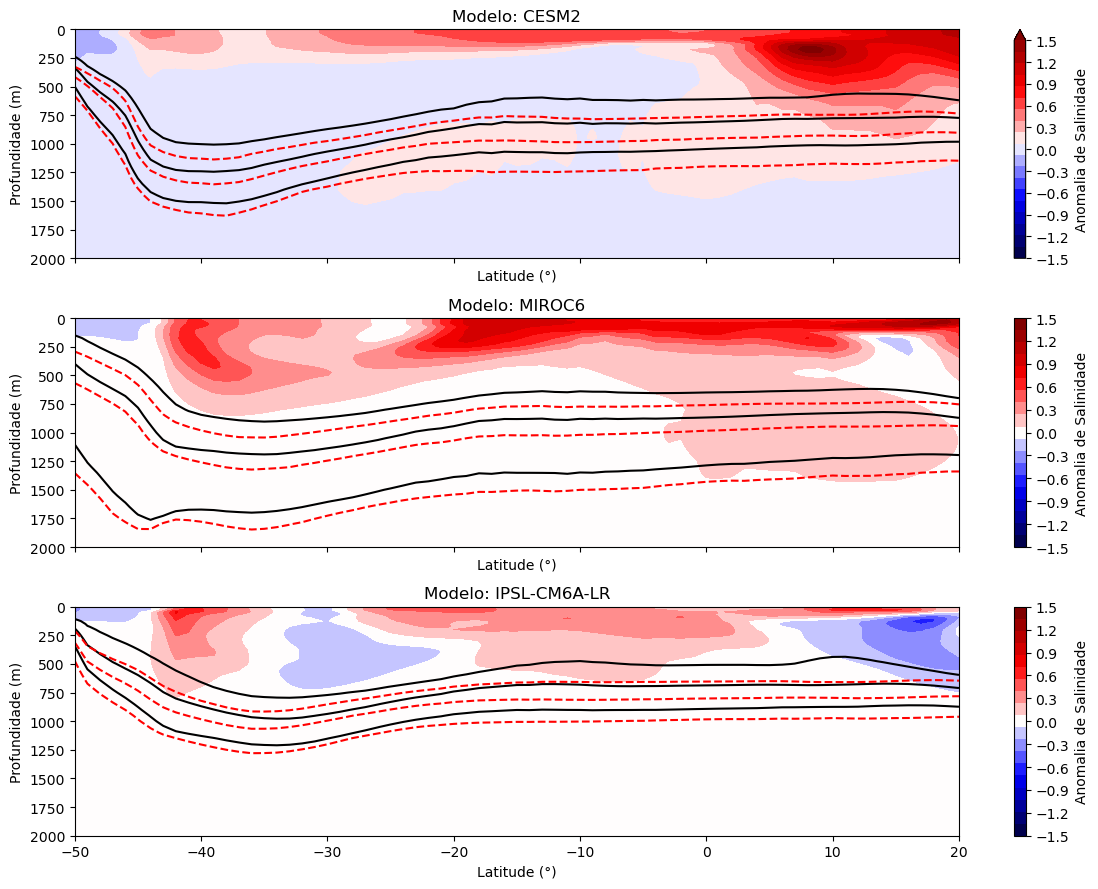

In [15]:
import os
import glob
import xarray as xr
import gsw
import matplotlib.pyplot as plt

# Obtém o diretório atual onde está o notebook
pasta_atual = os.path.dirname(os.path.abspath('__file__'))

# Usa a biblioteca glob para obter todos os arquivos NetCDF na pasta
arquivos = glob.glob(os.path.join(pasta_atual, '*.nc'))

# Ordena a lista de arquivos em ordem alfabética
arquivos = sorted(arquivos, reverse=True)

# Dicionário para armazenar os dados históricos
historical_data = {}

# Loop através dos arquivos
for arquivo in arquivos:
    if "historical" in arquivo:
        # Abre o conjunto de dados
        ds = xr.open_dataset(arquivo)

        # Obtém o nome do modelo a partir do nome do arquivo
        modelo = os.path.basename(arquivo).split(".")[2]

        # Calcula a média zonal para o período histórico
        historical_data[modelo] = ds.sel(time=slice("1980", "2014")).mean(dim="time")
        
        # Fecha o conjunto de dados
        ds.close()

# Cria subplots
fig, axs = plt.subplots(nrows=3, figsize=(12, 3*3), sharex=True, sharey=True)
i=0
# Loop novamente para tratar os arquivos ssp585
for arquivo in arquivos:
    if "ssp585" in arquivo:
        # Abre o conjunto de dados
        ds = xr.open_dataset(arquivo)

        # Obtém o nome do modelo a partir do nome do arquivo
        modelo = os.path.basename(arquivo).split(".")[2]

        # Calcula a média zonal para o período SSP585
        ssp585_data = ds.sel(time=slice("2080", "2100")).mean(dim="time")
        
        # Pega o histórico do modelo
        historical = historical_data[modelo]
        
        historical["sigma0"] = gsw.sigma0(historical["sa"], historical["thetao"])
        ssp585_data["sigma0"] = gsw.sigma0(ssp585_data["sa"], ssp585_data["thetao"])
        diff = ssp585_data - historical
        
        # Faz o plot no subplot correto axs[i]
        contour = diff.so.plot.contourf(ax=axs[i], x="lat", levels=50, cmap="seismic", add_colorbar=False, 
                                        vmin=-1.5, vmax=1.5)
        
        # Aplicar máscara para sigma0 > 26.4
        masked1_sigma0 = historical.sigma0.where(historical.sigma0 > 26.4)
        masked2_sigma0 = ssp585_data.sigma0.where(ssp585_data.sigma0 > 26.4)

        # Converter os dados do xarray em numpy
        contour_data = masked1_sigma0.values
        lat_values = masked1_sigma0.lat.values

        # Usar o contour do Matplotlib no subplot axs[i]
        contour_lines = axs[i].contour(lat_values, masked1_sigma0.lev, contour_data, levels=[27, 27.2, 27.4], 
                                       colors='black', linestyles="solid")

        # Converter os dados do xarray em numpy
        contour_data = masked2_sigma0.values
        lat_values = masked2_sigma0.lat.values

        # Usar o contour do Matplotlib no subplot axs[i]
        contour_lines = axs[i].contour(lat_values, masked2_sigma0.lev, contour_data, levels=[27, 27.2, 27.4], 
                                       colors='red', linestyles="dashed")
        
        axs[i].set_ylim(0, 2000)
        axs[i].invert_yaxis()
        axs[i].set_title(f"Modelo: {modelo}")
        
        # Adicionando rótulos aos eixos X e Y
        axs[i].set_xlabel('Latitude (°)')
        axs[i].set_ylabel('Profundidade (m)')
        
        # Adiciona a colorbar manualmente no subplot axs[i]
        cbar = plt.colorbar(contour, ax=axs[i])
        cbar.set_ticks(np.arange(-1.5, 1.52, 0.3))  # Ajuste os ticks conforme necessário
        cbar.set_label('Anomalia de Salinidade')

        # Fecha o conjunto de dados
        ds.close()
        
        #Adiciona próximo figura
        i = i + 1
# Ajusta o layout para evitar sobreposição de subplots
plt.tight_layout()

#Salva a figura
plt.savefig("Figuras/Anomalias_Modelos_Salinidade_SSP585.png")

# Exibe a figura
plt.show()


### SSP370 Salinidade

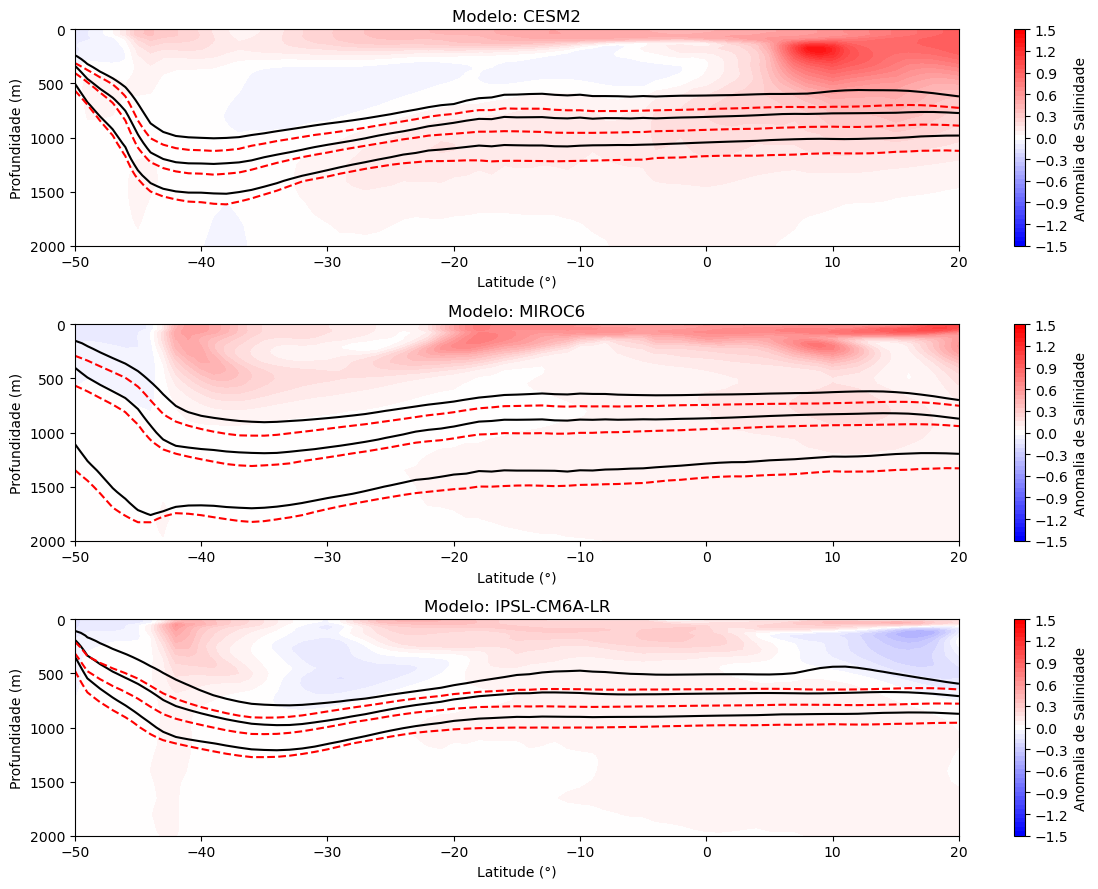

In [5]:
import os
import glob
import xarray as xr
import gsw
import matplotlib.pyplot as plt

# Obtém o diretório atual onde está o notebook
pasta_atual = os.path.dirname(os.path.abspath('__file__'))

# Usa a biblioteca glob para obter todos os arquivos NetCDF na pasta
arquivos = glob.glob(os.path.join(pasta_atual, '*.nc'))

# Ordena a lista de arquivos em ordem alfabética
arquivos = sorted(arquivos, reverse=True)

# Dicionário para armazenar os dados históricos
historical_data = {}

# Loop através dos arquivos
for arquivo in arquivos:
    if "historical" in arquivo:
        # Abre o conjunto de dados
        ds = xr.open_dataset(arquivo)

        # Obtém o nome do modelo a partir do nome do arquivo
        modelo = os.path.basename(arquivo).split(".")[2]

        # Calcula a média zonal para o período histórico
        historical_data[modelo] = ds.sel(time=slice("1980", "2014")).mean(dim="time")
        
        # Fecha o conjunto de dados
        ds.close()

# Cria subplots
fig, axs = plt.subplots(nrows=3, figsize=(12, 3*3), sharex=True, sharey=True)
i=0
# Loop novamente para tratar os arquivos ssp585
for arquivo in arquivos:
    if "ssp370" in arquivo:
        # Abre o conjunto de dados
        ds = xr.open_dataset(arquivo)

        # Obtém o nome do modelo a partir do nome do arquivo
        modelo = os.path.basename(arquivo).split(".")[2]

        # Calcula a média zonal para o período SSP585
        ssp585_data = ds.sel(time=slice("2080", "2100")).mean(dim="time")
        
        # Pega o histórico do modelo
        historical = historical_data[modelo]
        
        historical["sigma0"] = gsw.sigma0(historical["sa"], historical["thetao"])
        ssp585_data["sigma0"] = gsw.sigma0(ssp585_data["sa"], ssp585_data["thetao"])
        diff = ssp585_data - historical
        
        # Faz o plot no subplot correto axs[i]
        contour = diff.so.plot.contourf(ax=axs[i], x="lat", levels=50, cmap="bwr", add_colorbar=False,
                                        vmin=-1.5, vmax=1.5)
        
        # Aplicar máscara para sigma0 > 26.4
        masked1_sigma0 = historical.sigma0.where(historical.sigma0 > 26.4)
        masked2_sigma0 = ssp585_data.sigma0.where(ssp585_data.sigma0 > 26.4)

        # Converter os dados do xarray em numpy
        contour_data = masked1_sigma0.values
        lat_values = masked1_sigma0.lat.values

        # Usar o contour do Matplotlib no subplot axs[i]
        contour_lines = axs[i].contour(lat_values, masked1_sigma0.lev, contour_data, levels=[27, 27.2, 27.4], 
                                       colors='black', linestyles="solid")

        # Converter os dados do xarray em numpy
        contour_data = masked2_sigma0.values
        lat_values = masked2_sigma0.lat.values

        # Usar o contour do Matplotlib no subplot axs[i]
        contour_lines = axs[i].contour(lat_values, masked2_sigma0.lev, contour_data, levels=[27, 27.2, 27.4], 
                                       colors='red', linestyles="dashed")
        
        axs[i].set_ylim(0, 2000)
        axs[i].invert_yaxis()
        axs[i].set_title(f"Modelo: {modelo}")
        
        # Adicionando rótulos aos eixos X e Y
        axs[i].set_xlabel('Latitude (°)')
        axs[i].set_ylabel('Profundidade (m)')
        
        # Adiciona a colorbar manualmente no subplot axs[i]
        cbar = plt.colorbar(contour, ax=axs[i])
        cbar.set_ticks(np.arange(-1.5, 1.52, 0.3))  # Ajuste os ticks conforme necessário
        cbar.set_label('Anomalia de Salinidade')

        # Fecha o conjunto de dados
        ds.close()
        
        #Adiciona próximo figura
        i = i + 1
# Ajusta o layout para evitar sobreposição de subplots
plt.tight_layout()

#Salva a figura
plt.savefig("Figuras/Anomalias_Modelos_Salinidade_SSP370.png")

# Exibe a figura
plt.show()


# Mudanças de Temperatura -Futuro

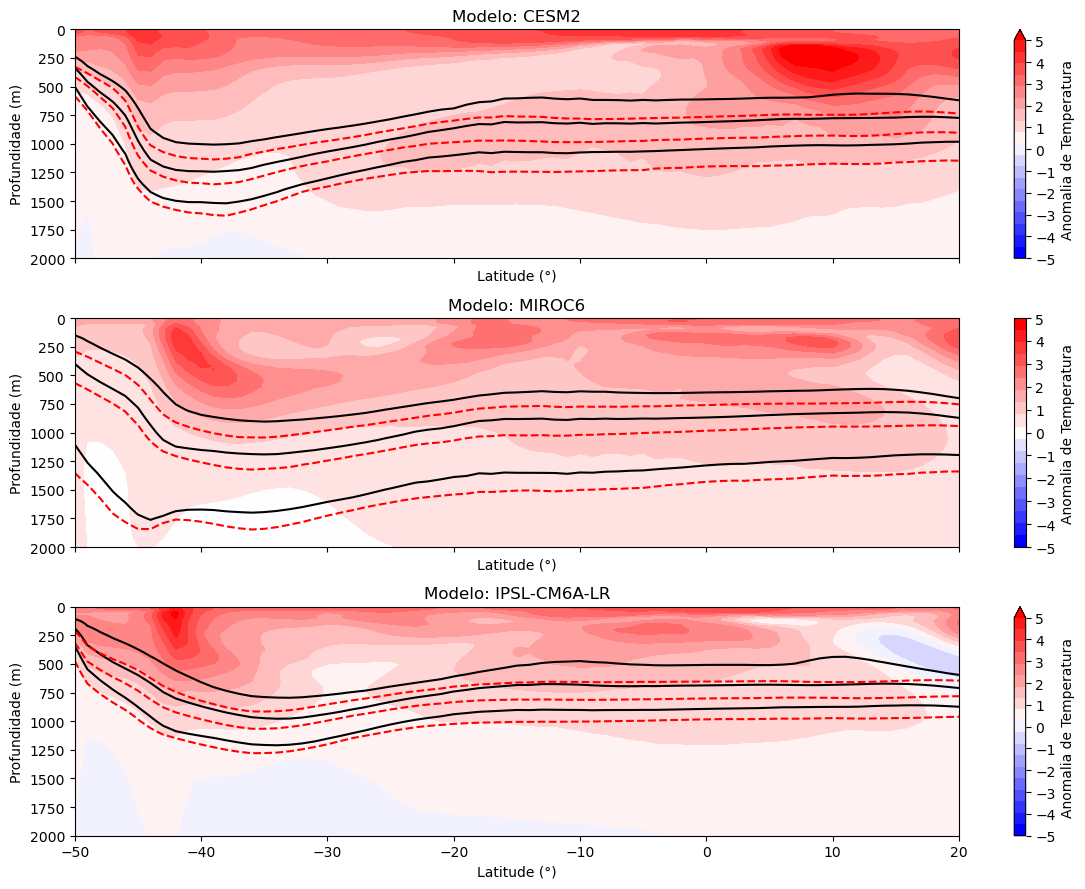

In [16]:
import os
import glob
import xarray as xr
import gsw
import matplotlib.pyplot as plt

# Obtém o diretório atual onde está o notebook
pasta_atual = os.path.dirname(os.path.abspath('__file__'))

# Usa a biblioteca glob para obter todos os arquivos NetCDF na pasta
arquivos = glob.glob(os.path.join(pasta_atual, '*.nc'))

# Ordena a lista de arquivos em ordem alfabética
arquivos = sorted(arquivos, reverse=True)

# Dicionário para armazenar os dados históricos
historical_data = {}

# Loop através dos arquivos
for arquivo in arquivos:
    if "historical" in arquivo:
        # Abre o conjunto de dados
        ds = xr.open_dataset(arquivo)

        # Obtém o nome do modelo a partir do nome do arquivo
        modelo = os.path.basename(arquivo).split(".")[2]

        # Calcula a média zonal para o período histórico
        historical_data[modelo] = ds.sel(time=slice("1980", "2014")).mean(dim="time")
        
        # Fecha o conjunto de dados
        ds.close()

# Cria subplots
fig, axs = plt.subplots(nrows=3, figsize=(12, 3*3), sharex=True, sharey=True)
i=0
# Loop novamente para tratar os arquivos ssp585
for arquivo in arquivos:
    if "ssp585" in arquivo:
        # Abre o conjunto de dados
        ds = xr.open_dataset(arquivo)

        # Obtém o nome do modelo a partir do nome do arquivo
        modelo = os.path.basename(arquivo).split(".")[2]

        # Calcula a média zonal para o período SSP585
        ssp585_data = ds.sel(time=slice("2080", "2100")).mean(dim="time")
        
        # Pega o histórico do modelo
        historical = historical_data[modelo]
        
        historical["sigma0"] = gsw.sigma0(historical["sa"], historical["thetao"])
        ssp585_data["sigma0"] = gsw.sigma0(ssp585_data["sa"], ssp585_data["thetao"])
        diff = ssp585_data - historical
        
        # Faz o plot no subplot correto axs[i]
        contour = diff.thetao.plot.contourf(ax=axs[i], x="lat", levels=20, cmap="bwr", add_colorbar=False, 
                                        vmin=-5, vmax=5)
        
        # Aplicar máscara para sigma0 > 26.4
        masked1_sigma0 = historical.sigma0.where(historical.sigma0 > 26.4)
        masked2_sigma0 = ssp585_data.sigma0.where(ssp585_data.sigma0 > 26.4)

        # Converter os dados do xarray em numpy
        contour_data = masked1_sigma0.values
        lat_values = masked1_sigma0.lat.values

        # Usar o contour do Matplotlib no subplot axs[i]
        contour_lines = axs[i].contour(lat_values, masked1_sigma0.lev, contour_data, levels=[27, 27.2, 27.4], 
                                       colors='black', linestyles="solid")

        # Converter os dados do xarray em numpy
        contour_data = masked2_sigma0.values
        lat_values = masked2_sigma0.lat.values

        # Usar o contour do Matplotlib no subplot axs[i]
        contour_lines = axs[i].contour(lat_values, masked2_sigma0.lev, contour_data, levels=[27, 27.2, 27.4], 
                                       colors='red', linestyles="dashed")
        
        axs[i].set_ylim(0, 2000)
        axs[i].invert_yaxis()
        axs[i].set_title(f"Modelo: {modelo}")
        
        # Adicionando rótulos aos eixos X e Y
        axs[i].set_xlabel('Latitude (°)')
        axs[i].set_ylabel('Profundidade (m)')
        
        # Adiciona a colorbar manualmente no subplot axs[i]
        cbar = plt.colorbar(contour, ax=axs[i])
        cbar.set_ticks(np.arange(-5, 5.1, 1))  # Ajuste os ticks conforme necessário
        cbar.set_label('Anomalia de Temperatura')

        # Fecha o conjunto de dados
        ds.close()
        
        #Adiciona próximo figura
        i = i + 1
# Ajusta o layout para evitar sobreposição de subplots
plt.tight_layout()

#Salva a figura
plt.savefig("Figuras/Anomalias_Modelos_Temperatura_SSP585.png")

# Exibe a figura
plt.show()


## Plots futuros -- sssp370

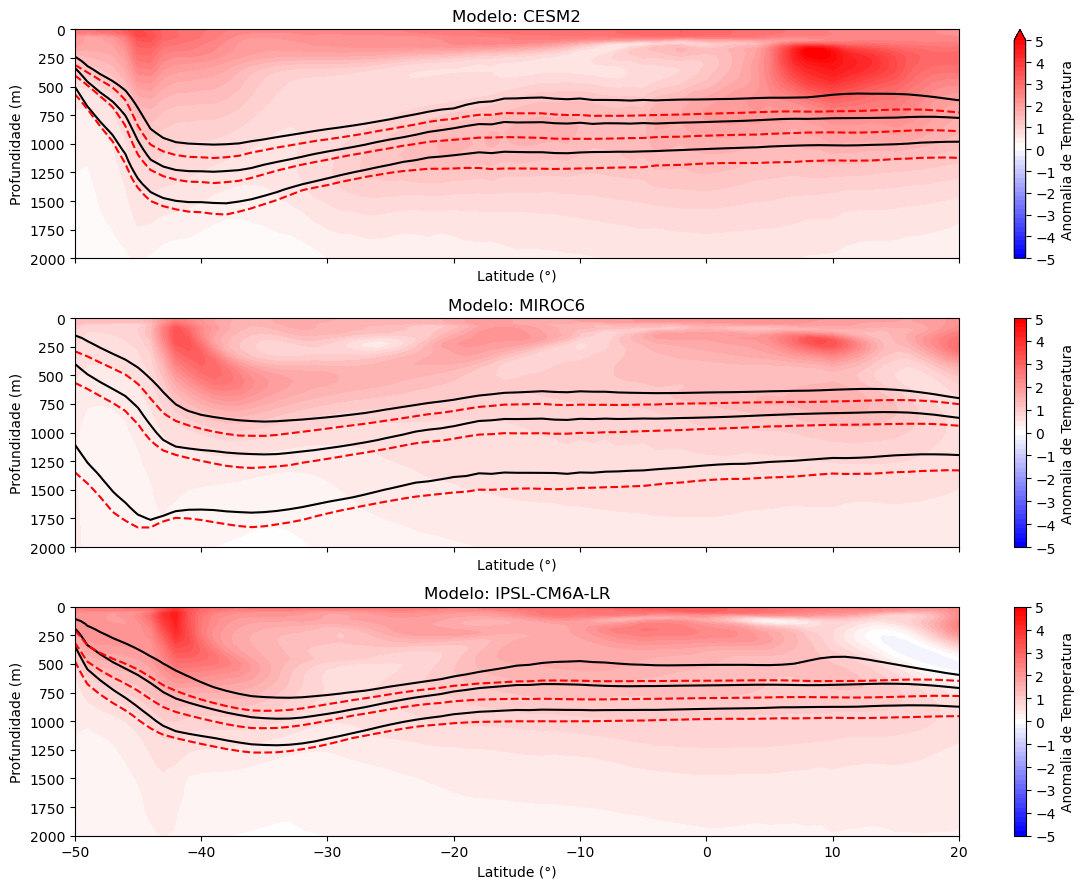

In [11]:
import os
import glob
import xarray as xr
import gsw
import matplotlib.pyplot as plt

# Obtém o diretório atual onde está o notebook
pasta_atual = os.path.dirname(os.path.abspath('__file__'))

# Usa a biblioteca glob para obter todos os arquivos NetCDF na pasta
arquivos = glob.glob(os.path.join(pasta_atual, '*.nc'))

# Ordena a lista de arquivos em ordem alfabética
arquivos = sorted(arquivos, reverse=True)

# Dicionário para armazenar os dados históricos
historical_data = {}

# Loop através dos arquivos
for arquivo in arquivos:
    if "historical" in arquivo:
        # Abre o conjunto de dados
        ds = xr.open_dataset(arquivo)

        # Obtém o nome do modelo a partir do nome do arquivo
        modelo = os.path.basename(arquivo).split(".")[2]

        # Calcula a média zonal para o período histórico
        historical_data[modelo] = ds.sel(time=slice("1980", "2014")).mean(dim="time")
        
        # Fecha o conjunto de dados
        ds.close()

# Cria subplots
fig, axs = plt.subplots(nrows=3, figsize=(12, 3*3), sharex=True, sharey=True)
i=0
# Loop novamente para tratar os arquivos ssp585
for arquivo in arquivos:
    if "ssp370" in arquivo:
        # Abre o conjunto de dados
        ds = xr.open_dataset(arquivo)

        # Obtém o nome do modelo a partir do nome do arquivo
        modelo = os.path.basename(arquivo).split(".")[2]

        # Calcula a média zonal para o período SSP585
        ssp585_data = ds.sel(time=slice("2080", "2100")).mean(dim="time")
        
        # Pega o histórico do modelo
        historical = historical_data[modelo]
        
        historical["sigma0"] = gsw.sigma0(historical["sa"], historical["thetao"])
        ssp585_data["sigma0"] = gsw.sigma0(ssp585_data["sa"], ssp585_data["thetao"])
        diff = ssp585_data - historical
        
        # Faz o plot no subplot correto axs[i]
        contour = diff.thetao.plot.contourf(ax=axs[i], x="lat", levels=50, cmap="bwr", add_colorbar=False, 
                                        vmin=-5, vmax=5)
        
        # Aplicar máscara para sigma0 > 26.4
        masked1_sigma0 = historical.sigma0.where(historical.sigma0 > 26.4)
        masked2_sigma0 = ssp585_data.sigma0.where(ssp585_data.sigma0 > 26.4)

        # Converter os dados do xarray em numpy
        contour_data = masked1_sigma0.values
        lat_values = masked1_sigma0.lat.values

        # Usar o contour do Matplotlib no subplot axs[i]
        contour_lines = axs[i].contour(lat_values, masked1_sigma0.lev, contour_data, levels=[27, 27.2, 27.4], 
                                       colors='black', linestyles="solid")

        # Converter os dados do xarray em numpy
        contour_data = masked2_sigma0.values
        lat_values = masked2_sigma0.lat.values

        # Usar o contour do Matplotlib no subplot axs[i]
        contour_lines = axs[i].contour(lat_values, masked2_sigma0.lev, contour_data, levels=[27, 27.2, 27.4], 
                                       colors='red', linestyles="dashed")
        
        axs[i].set_ylim(0, 2000)
        axs[i].invert_yaxis()
        axs[i].set_title(f"Modelo: {modelo}")
        
        # Adicionando rótulos aos eixos X e Y
        axs[i].set_xlabel('Latitude (°)')
        axs[i].set_ylabel('Profundidade (m)')
        
        # Adiciona a colorbar manualmente no subplot axs[i]
        cbar = plt.colorbar(contour, ax=axs[i])
        cbar.set_ticks(np.arange(-5, 5.1, 1))  # Ajuste os ticks conforme necessário
        cbar.set_label('Anomalia de Temperatura')

        # Fecha o conjunto de dados
        ds.close()
        
        #Adiciona próximo figura
        i = i + 1
# Ajusta o layout para evitar sobreposição de subplots
plt.tight_layout()

#Salva a figura
plt.savefig("Figuras/Anomalias_Modelos_Temperatura_SSP370.png")

# Exibe a figura
plt.show()

